In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier


In [2]:
data_train= pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Training set size: ", data_train.shape)
print("Test set size: ", data_test.shape)

Training set size:  (891, 12)
Test set size:  (418, 11)


In [5]:
data_train.info()
data_train.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


866

In [10]:
data_test.info()
data_test.isnull().sum() # It's evident that the cabin feature has too many null values, which means it can be dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# Here, the numeric and categorical features are separated from further use

train_num_fea = data_train.select_dtypes(include = ["float", "int"]).columns.to_list()
train_cat_fea = data_train.select_dtypes(include = ["object"]).columns.to_list()

data_train_num = data_train[train_num_fea]

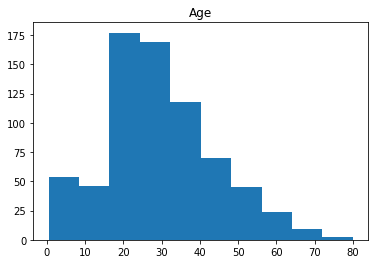

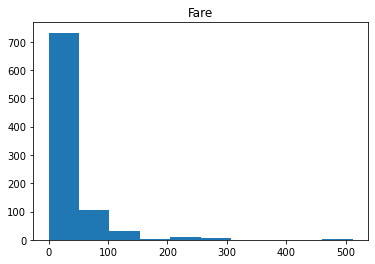

In [13]:
for fea in data_train_num.columns:
    plt.hist(data_train_num[fea])
    plt.title(fea)
    plt.show()

In [14]:
df_train = data_train.fillna(data_train.median())
df_train = df_train.drop(["Cabin", "Name"], axis = 1)
df_train = df_train.fillna(df_train["Embarked"].value_counts().index[0])


In [15]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [16]:
#This is to confirm that there are no more null values in the dataframe

df_train = df_train.fillna(df_train.median())
df_train = df_train.fillna(df_train["Embarked"].value_counts().index[0])
print(df_train.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [16]:
print(df["Sex"].value_counts())
print(df["Pclass"].value_counts())
print(df["SibSp"].value_counts())
print(df["Parch"].value_counts())
print(df["Embarked"].value_counts())

male      577
female    314
Name: Sex, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [17]:
X_train = df_train.drop(["PassengerId", "Survived"], axis = 1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,1,0,113803,53.1000,S
4,3,male,35.0,0,0,373450,8.0500,S


In [19]:
y_train = df_train["Survived"]
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [20]:
df_test = data_test.drop(["Cabin", "Name"], axis = 1)
df_test = df_test.fillna(data_test.median())
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
print(type(df_test))

<class 'pandas.core.frame.DataFrame'>


In [22]:
df_test.head()
X_test = df_test.drop(["PassengerId"], axis=1)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
4,3,female,22.0,1,1,3101298,12.2875,S


In [22]:
cat_features = np.where(X_train.dtypes != float)[0]

cat_clfr = CatBoostClassifier(iterations = 20, learning_rate = 0.9,)

model_2 = cat_clfr.fit(X_train, y_train, cat_features = cat_features, verbose = False)

print("Training accuracy with catboost is: ", model_2.score(X_train, y_train))

Training accuracy with catboost is:  0.9135802469135802


In [23]:
y_pred = model_2.predict(X_test)

In [24]:
pass_id = df_test["PassengerId"]

In [25]:
df_predictions = pd.DataFrame.from_dict({"PassengerId": pass_id , "Survived": y_pred})
df_predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [26]:
df_predictions.to_csv("submission_titanic_catboost_2.csv", index = False)